In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
! wget https://www.statlearning.com/s/Advertising.csv

--2024-03-17 17:17:14--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2024-03-17 17:17:15--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

In [4]:
# Read in a CSV file
adv = pd.read_csv('Advertising.csv')

In [6]:
adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
# Fit a linear model
myFit = LinearRegression()
myFit.fit(adv[['TV']], adv['sales'])

LinearRegression()

In [12]:
# Print the summary of the fit
print(myFit.intercept_, myFit.coef_, myFit.score(adv[['TV']], adv['sales']))

7.032593549127695 [0.04753664] 0.611875050850071


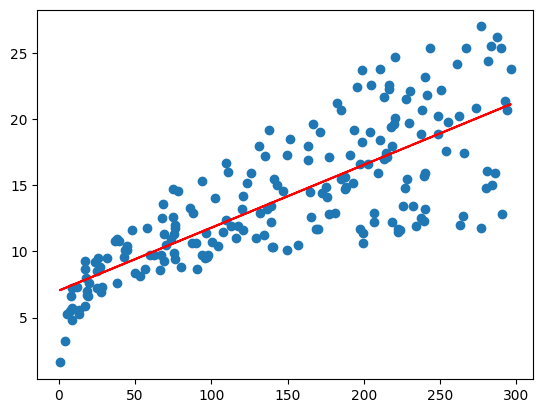

In [9]:
# Plot the data and the fitted line
plt.scatter(adv['TV'], adv['sales'])
plt.plot(adv['TV'], myFit.predict(adv[['TV']]), color='red')
plt.show()

In [13]:
# From https://www.statology.org/sklearn-linear-regression-summary/
import statsmodels.api as sm

In [18]:
y = adv['sales']
x = adv[['TV']]

In [19]:
x = sm.add_constant(x)

In [20]:
x

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8
...,...,...
195,1.0,38.2
196,1.0,94.2
197,1.0,177.0
198,1.0,283.6


In [21]:
model = sm.OLS(y, x).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        17:22:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0